In [1]:
from sklearn.preprocessing import StandardScaler

import numpy as np
from numpy import load
import scipy
import matplotlib.pyplot as plt
from scipy.special import legendre
from numpy.linalg import svd

from time import time
from numpy import sin as sin

import math

In [2]:
import pandas as pd
scale=StandardScaler()


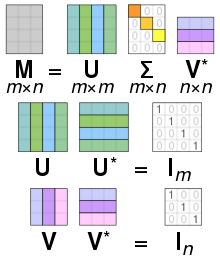

`table of inner product of leg(x),leg(y) `

In [26]:
x = np.linspace(-1,1,5000)
# data frame label 12 columns 12 rows by number of x
df = pd.DataFrame(index=range(1,13), columns=range(1,13))
for X in range(0,12):
    for Y in range(0,12):
        n1=np.linalg.norm(legendre(X)(x))
        n2=np.linalg.norm(legendre(Y)(x))
        df.iloc[X,Y] = np.sum(legendre(X)(x)*legendre(Y)(x))/(n1*n2)
df

,1,2,3,4,5,6,7,8,9,10,11,12
1,1.0,0.0,0.000447,0.0,0.0006,-0.0,0.000721,-0.0,0.000825,-0.0,0.000918,0.0
2,0.0,1.0,-0.0,0.000916,-0.0,0.001149,-0.0,0.001342,-0.0,0.001512,0.0,0.001665
3,0.000447,-0.0,1.0,-0.0,0.001341,-0.0,0.001612,-0.0,0.001845,-0.0,0.002052,-0.0
4,0.0,0.000916,-0.0,1.0,-0.0,0.001755,-0.0,0.00205,-0.0,0.002309,-0.0,0.002543
5,0.0006,-0.0,0.001341,-0.0,1.0,-0.0,0.002163,0.0,0.002475,-0.0,0.002754,-0.0
6,-0.0,0.001149,-0.0,0.001755,-0.0,1.0,0.0,0.00257,-0.0,0.002895,-0.0,0.003188
7,0.000721,-0.0,0.001612,-0.0,0.002163,0.0,1.0,-0.0,0.002976,-0.0,0.003311,-0.0
8,-0.0,0.001342,-0.0,0.00205,0.0,0.00257,-0.0,1.0,-0.0,0.003382,-0.0,0.003725
9,0.000825,-0.0,0.001845,-0.0,0.002475,-0.0,0.002976,-0.0,1.0,-0.0,0.003788,-0.0
10,-0.0,0.001512,-0.0,0.002309,-0.0,0.002895,-0.0,0.003382,-0.0,1.0,-0.0,0.004195


In [27]:
x = np.linspace(-math.pi,math.pi,50)
# data frame label 12 columns 12 rows bysmooth_using _normlised _legendre. number of x
df = pd.DataFrame(index=range(1,13), columns=range(1,13))
for X in range(0,12):
    for Y in range(0,12):
        n1=np.linalg.norm(sin((X+1)*x))
        n2=np.linalg.norm(sin((Y+1)*x))
        df.iloc[X,Y] = np.sum(sin((X+1)*x)*sin((Y+1)*x))/(n1*n2)
df

,1,2,3,4,5,6,7,8,9,10,11,12
1,1.0,0.0,-0.0,-0.0,-0.0,-0.0,0.0,0.0,0.0,-0.0,0.0,0.0
2,0.0,1.0,-0.0,-0.0,0.0,0.0,-0.0,0.0,-0.0,0.0,0.0,0.0
3,-0.0,-0.0,1.0,-0.0,-0.0,-0.0,0.0,-0.0,0.0,-0.0,0.0,0.0
4,-0.0,-0.0,-0.0,1.0,0.0,-0.0,-0.0,0.0,0.0,0.0,0.0,-0.0
5,-0.0,0.0,-0.0,0.0,1.0,-0.0,0.0,0.0,0.0,0.0,-0.0,0.0
6,-0.0,0.0,-0.0,-0.0,-0.0,1.0,0.0,0.0,0.0,-0.0,0.0,-0.0
7,0.0,-0.0,0.0,-0.0,0.0,0.0,1.0,0.0,-0.0,0.0,0.0,0.0
8,0.0,0.0,-0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-0.0,-0.0
9,0.0,-0.0,0.0,0.0,0.0,0.0,-0.0,0.0,1.0,0.0,-0.0,0.0
10,-0.0,0.0,-0.0,0.0,0.0,-0.0,0.0,0.0,0.0,1.0,0.0,-0.0


## def function


In [5]:
#DEF FUNCTION INPUT SHOULD BE ONLY INT GIVE SQUARE
import math
def superposition(data: np.ndarray):# it will create super position of 12 lead ecg data 
    """
    This function takes a 5000 * 12 lead data and returns the superposition of the data.
    superpostion matrix multiplied by legendre(j+1)(x) we get the j-th column of the data matrix 
    or we can say the jth lead of the ecg data
    """
    scale=StandardScaler()
    # making each colum of 5000 datapoint should be in
    sum=np.zeros((5000,5000))
    x = np.linspace(-1,1,5000)
    for i in range(data.shape[1]):
        leg=legendre(i+1)(x)
        norm=math.sqrt(np.sum(leg*leg))
        sum=sum+np.outer(data[:,i],#data is in shaPE OF 5000xDATA.shape[1] AN SHAPE[1] MEANS THE NUMBER OF COLUMNS
                         leg#legendre polinomial of order i+1 apllied to x p_n applies to matrix x
                         )/norm
        #outer product of the i-th column of the data matrix and the i-th legendre polynomial
        
    
    return sum

def inversed_superposition(sup):# it will inverse the superposition of 12 lead ecg data
    inversed_sup=[]
    x = np.linspace(-1,1,5000)
    for i in range(1,13):
        leg=legendre(i)(x)
        norm=math.sqrt(np.sum(leg*leg))
        inversed_sup.append(np.dot(sup, leg) / norm)
    return np.array(inversed_sup).T

def inversed_superposition_sin(sup):# it will inverse the superposition of 12 lead ecg data
    inversed_sup=[]
    x = np.linspace(-math.pi,math.pi,5000)
    for i in range(1,13):
        sine=sin(i*x)
        norm=math.sqrt(np.sum(sine*sine))
        inversed_sup.append(np.dot(sup, sine) / norm)
    return np.array(inversed_sup).T
        

def normalize_matrix(matrix):
    """take input as 500*12 or a person report and return the normalized matrix 
    >>>sum of square of all the elements of the norm_matrix is 1"""
    
    matrix_norm = np.linalg.norm(matrix, 'fro')#frobenius norm is the square root of the sum of the absolute squares of its elements
                                                # works for 2d arrays
    if np.isnan(matrix_norm):# is NAN not a number 
        #it will return a matrix of zeros of the same shape as the input matrix
        return np.zeros_like(matrix)
    else:
        normalized_matrix = matrix / matrix_norm
        return normalized_matrix
    
def superposition_sin(data: np.ndarray):# it will create super position of 12 lead ecg data 
    """
    This function takes a 5000 * 12 lead data and returns the superposition of the data.
    superpostion matrix multiplied by legendre(j+1)(x) we get the j-th column of the data matrix 
    or we can say the jth lead of the ecg data
    """
    scale=StandardScaler()
    # making each colum of 5000 datapoint should be in
    scaled = scale.fit_transform(data)# normal distribution of each column of the data matrix # feature scaling
    sum=np.zeros((5000,5000))
    x = np.linspace(-math.pi,math.pi,5000)
    for i in range(data.shape[1]):
        sine=sin((i+1)*x)
        norm=np.linalg.norm(sine)
        sum=sum+np.outer(data[:,i],#data is in shaPE OF 5000xDATA.shape[1] AN SHAPE[1] MEANS THE NUMBER OF COLUMNS
                         sine#legendre polinomial of order i+1 apllied to x p_n applies to matrix x
                         )/norm
        #outer product of the i-th column of the data matrix and the i-th legendre polynomial
        
    
    return sum
    

In [6]:
import os
os.getcwd()
# go one directory back
os.chdir("..")
os.getcwd()# i have numpy files in karan_ecg/data_prep

'c:\\Users\\karan\\summer term\\KARAN_ECG'

# DATA and function visualization

In [7]:
data = load('data_prep/disease_SR.npy')


`cheking that can we retrive the graph from super position matrix`

`scaled the 12 lead data before the input inversed_scaled is thae data which is inversed scaled from the superposition matrix `

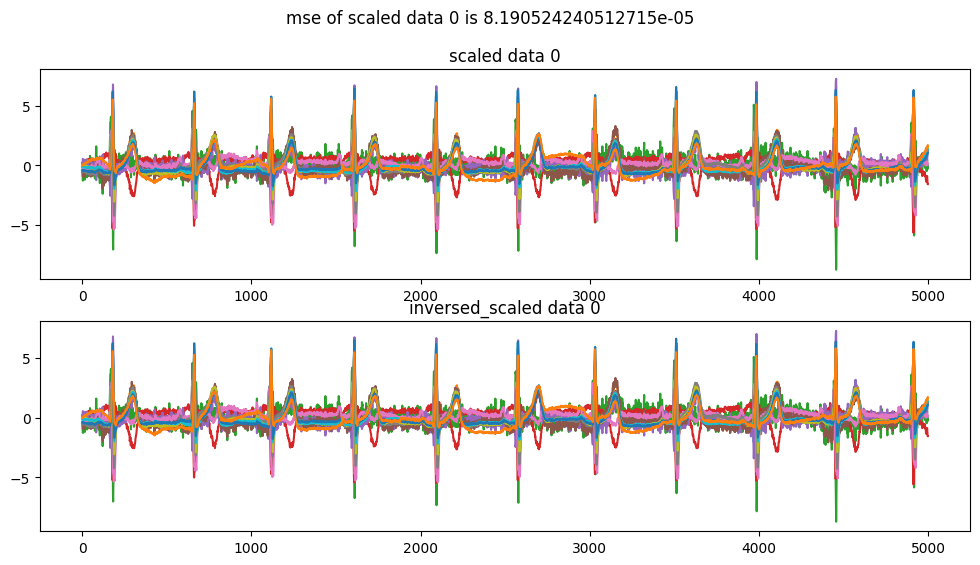

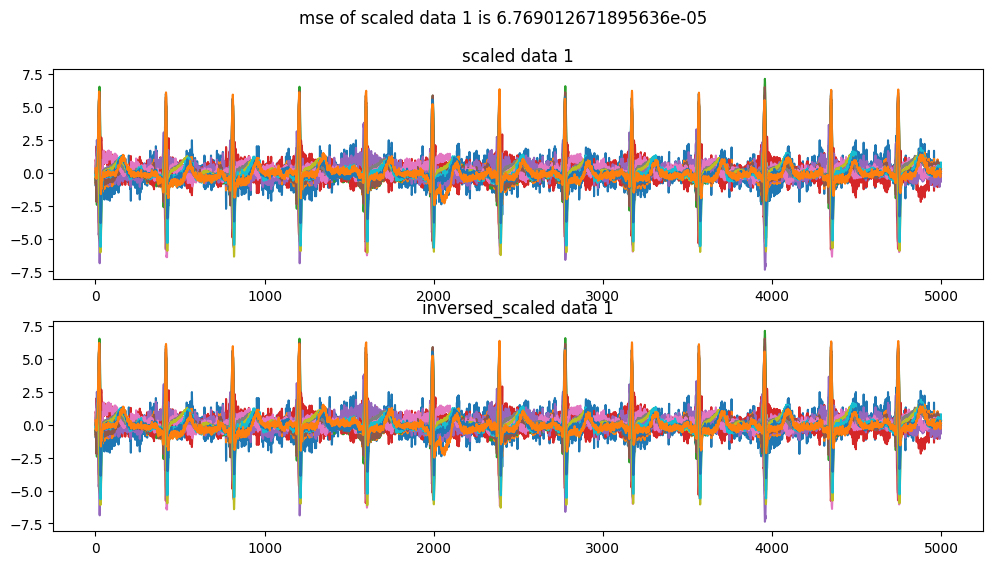

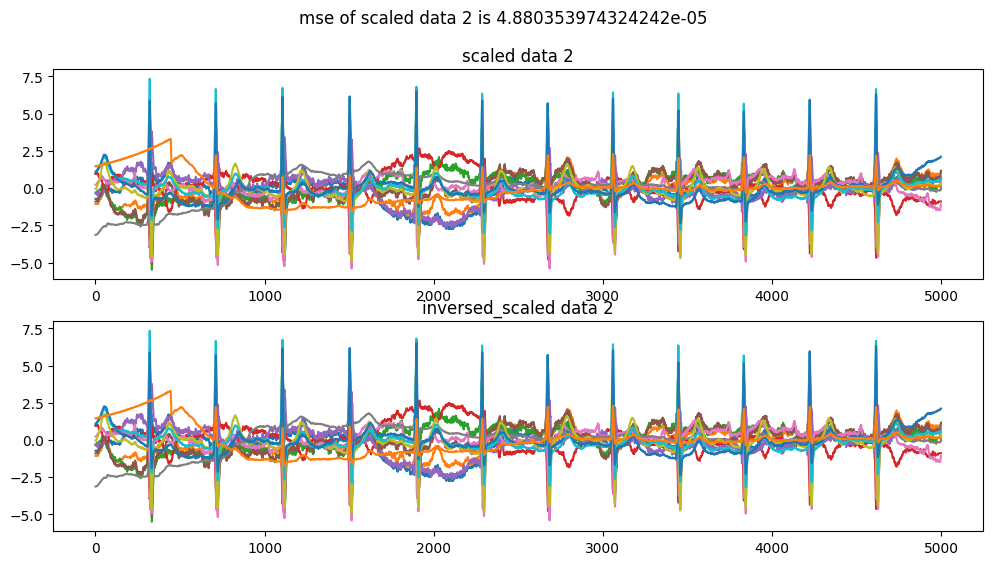

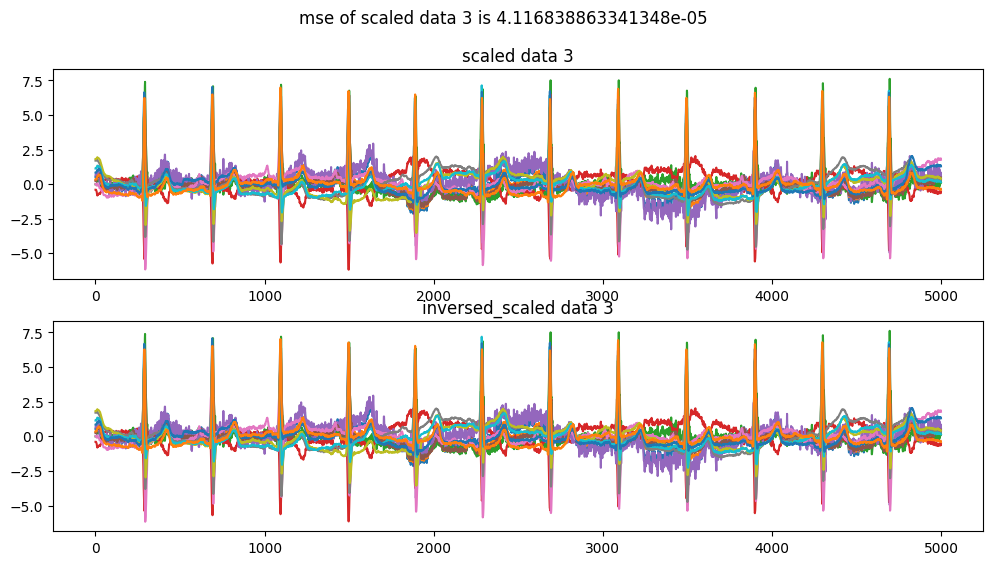

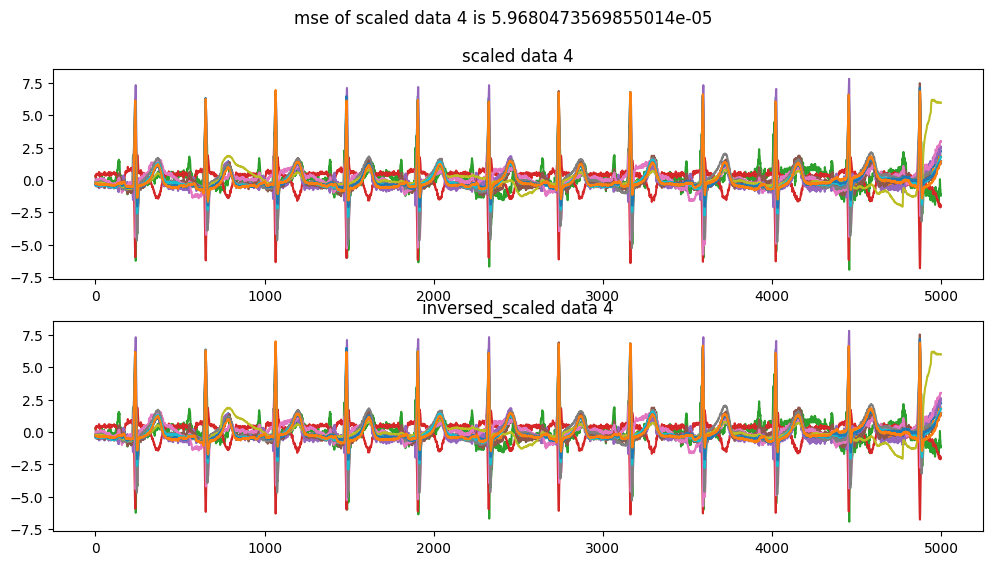

In [20]:

    


for X in range(5):
    cc=data[X]

    normlised_cc = normalize_matrix(cc)
    scaled = scale.fit_transform(normlised_cc)
    sup=superposition(scaled)
    inversed_scaled=inversed_superposition(sup)
    # plot scaled data and inversed scaled data
    fig, axs = plt.subplots(2, 1, figsize=(12, 6))
    # title
    fig.suptitle(f'mse of scaled data {X} is {mse}')

    # Plot the scaled data
    axs[0].plot(scaled)
    axs[0].set_title(f'scaled data {X}')

    # Plot the inversed_scaled data
    axs[1].plot(inversed_scaled)
    axs[1].set_title(f'inversed_scaled data {X}')
    plt.show()
    # mse of scaled data and inversed scaled data
    mse = np.mean((scaled-inversed_scaled)**2)





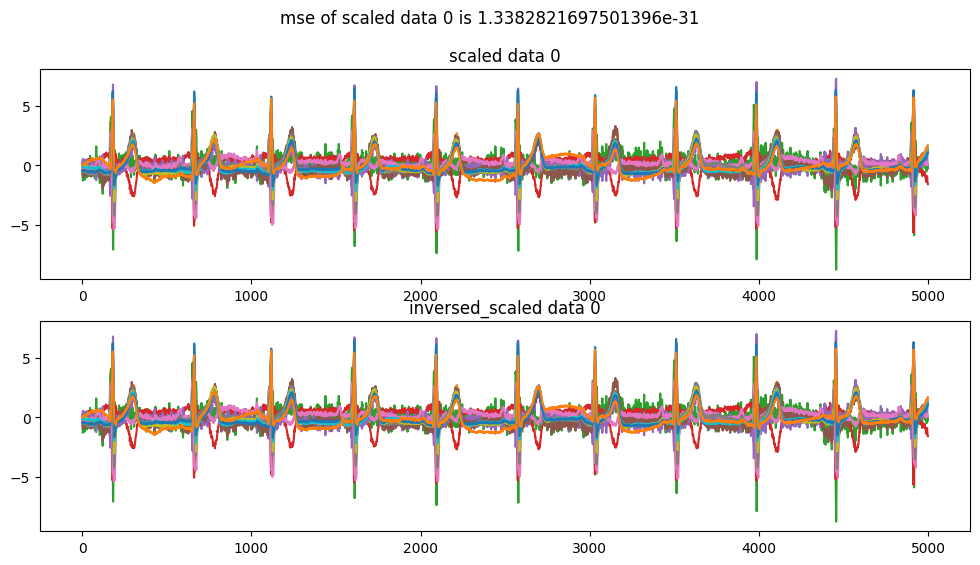

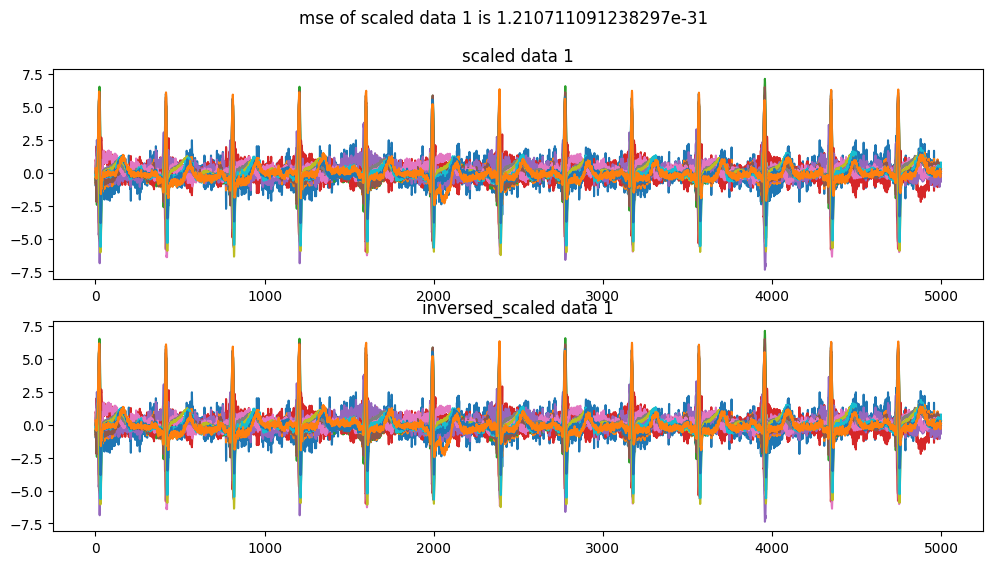

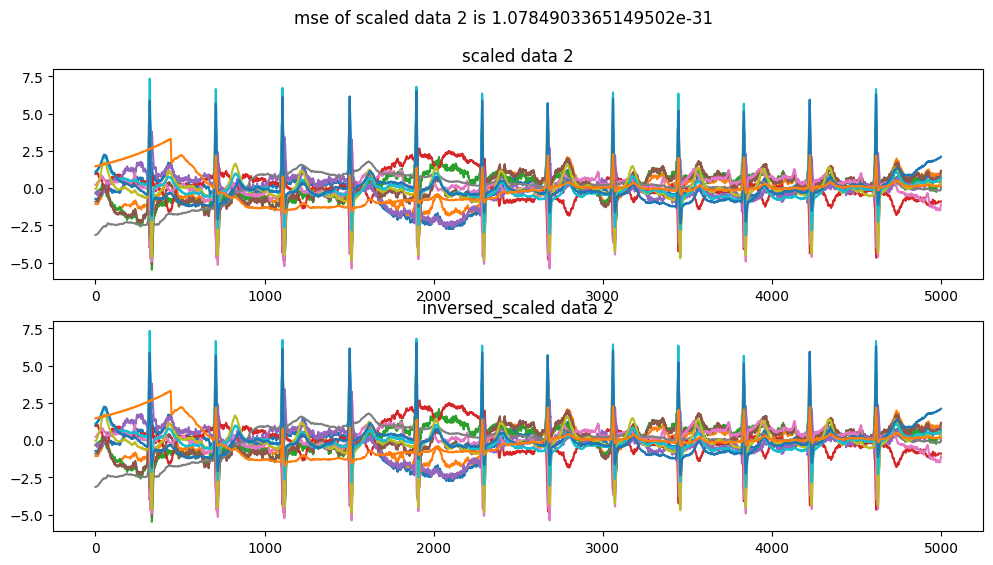

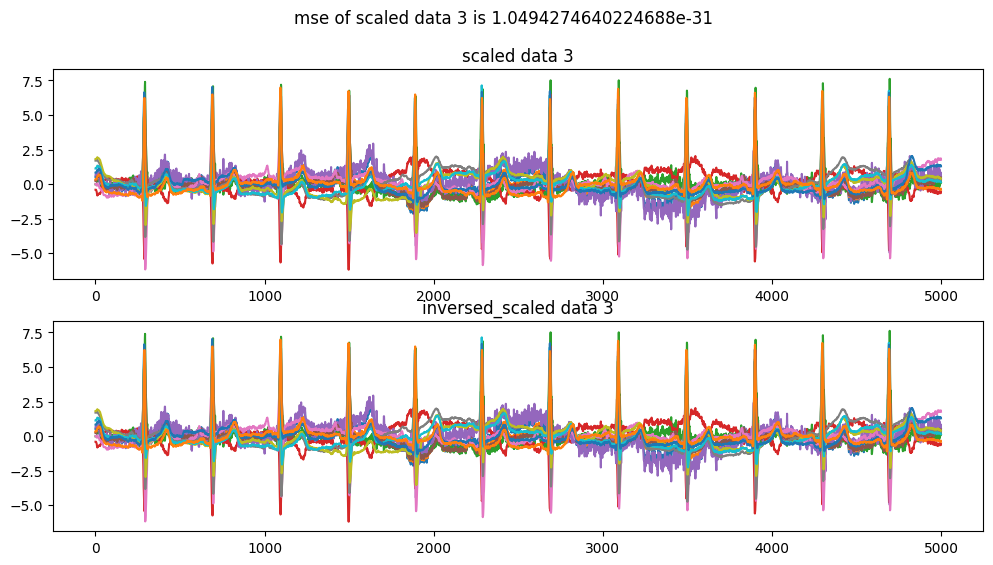

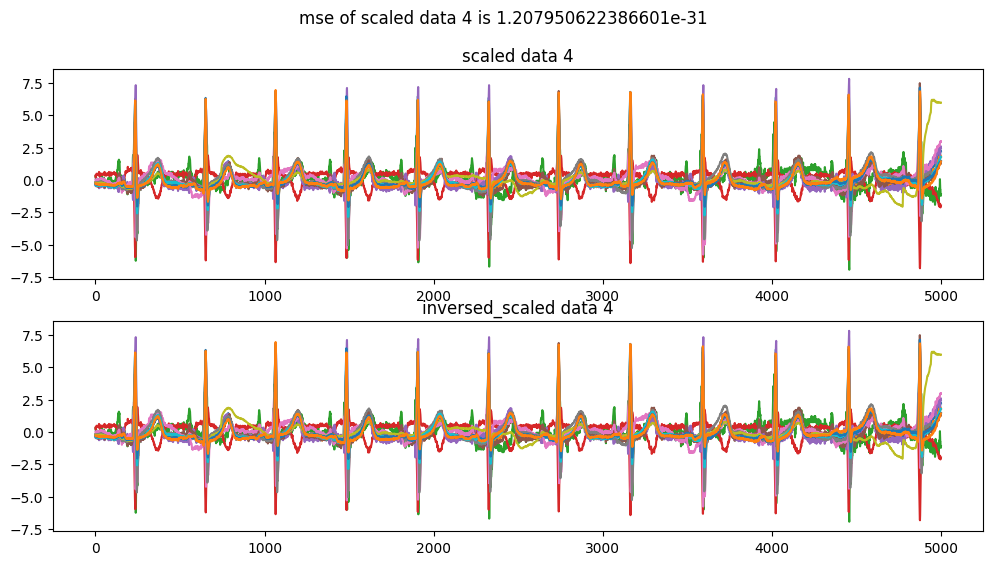

In [23]:

    


for X in range(5):
    cc=data[X]

    normlised_cc = normalize_matrix(cc)
    scaled = scale.fit_transform(normlised_cc)
    sup=superposition_sin(scaled)
    inversed_scaled=inversed_superposition_sin(sup)
    # plot scaled data and inversed scaled data
    fig, axs = plt.subplots(2, 1, figsize=(12, 6))
    # title
    fig.suptitle(f'mse of scaled data {X} is {mse}')

    # Plot the scaled data
    axs[0].plot(scaled)
    axs[0].set_title(f'scaled data {X}')

    # Plot the inversed_scaled data
    axs[1].plot(inversed_scaled)
    axs[1].set_title(f'inversed_scaled data {X}')
    plt.show()
    # mse of scaled data and inversed scaled data
    mse = np.mean((scaled-inversed_scaled)**2)



